In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [3]:
fertility_data = pd.read_csv("clean_fertility.csv", index_col='State')
income_data = pd.read_csv("clean_income.csv", index_col='State')

In [4]:
fertility_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Guam to Total United States
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008    57 non-null     float64
 1   2009    57 non-null     float64
 2   2010    57 non-null     float64
 3   2011    57 non-null     float64
 4   2012    57 non-null     float64
 5   2013    57 non-null     float64
 6   2014    57 non-null     float64
 7   2015    57 non-null     float64
 8   2016    57 non-null     float64
 9   2017    56 non-null     float64
 10  2018    55 non-null     float64
 11  2019    55 non-null     float64
 12  2020    56 non-null     float64
 13  2021    56 non-null     float64
 14  2022    56 non-null     float64
dtypes: float64(15)
memory usage: 7.1+ KB


In [5]:
fertility_data['Growth Rate'] = ((fertility_data['2022'] - fertility_data['2008']) / fertility_data['2008']) * 100
fertility_data['Growth Rate'] = fertility_data['Growth Rate'].round(2)
fertility_data['Growth Rate']

State
Guam                   -17.22
American Samoa            NaN
South Dakota           -14.47
Nebraska               -15.28
Alaska                 -21.58
Louisiana              -11.06
Utah                   -28.85
Iowa                   -12.80
North Dakota           -13.62
Texas                  -22.03
Kansas                 -18.67
Kentucky               -11.65
Idaho                  -26.72
Oklahoma               -18.55
Arkansas               -17.13
Mississippi            -18.64
Indiana                -14.83
Minnesota              -17.06
New Jersey             -15.05
Alabama                -15.53
Hawaii                 -25.64
Northern Mariana Is.   -24.78
Tennessee              -16.43
Delaware               -18.96
Missouri               -16.59
North Carolina         -19.34
Ohio                   -14.57
South Carolina         -20.19
Maryland               -16.75
Wyoming                -25.88
Georgia                -23.04
Virginia               -18.32
Wisconsin              -17.50
Flor

In [6]:
fertility_data = fertility_data.dropna(subset=['Growth Rate'])

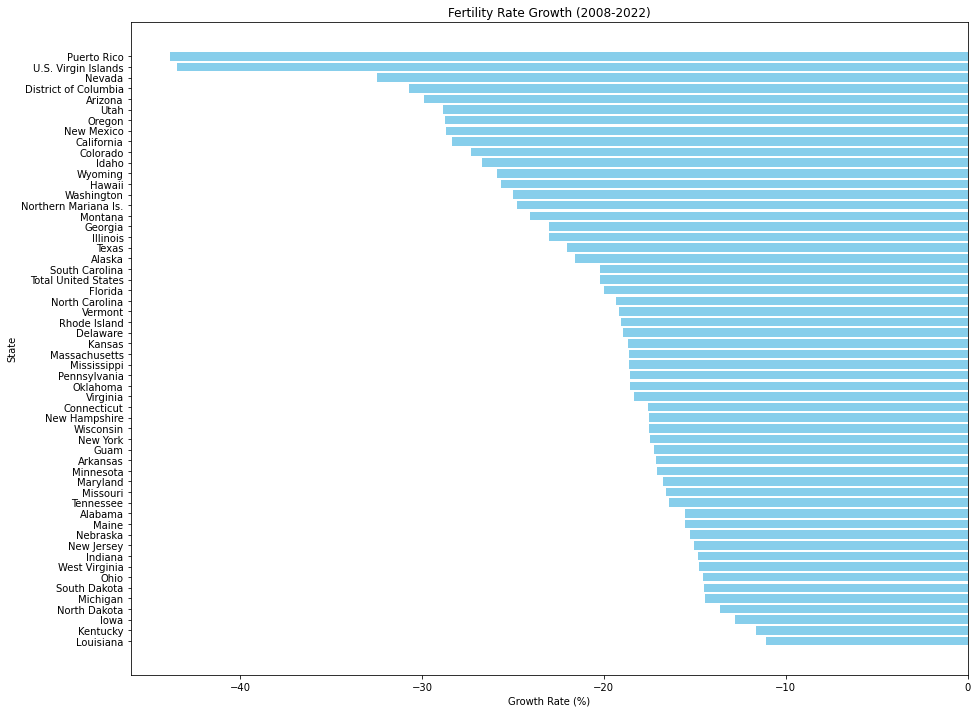

In [7]:
fertility_data_sorted = fertility_data.sort_values(by='Growth Rate', ascending=False)

plt.figure(figsize=(15, 12))
plt.barh(fertility_data_sorted.index, fertility_data_sorted['Growth Rate'], color='skyblue')
plt.xlabel('Growth Rate (%)')
plt.ylabel('State')
plt.title('Fertility Rate Growth (2008-2022)')
plt.show()


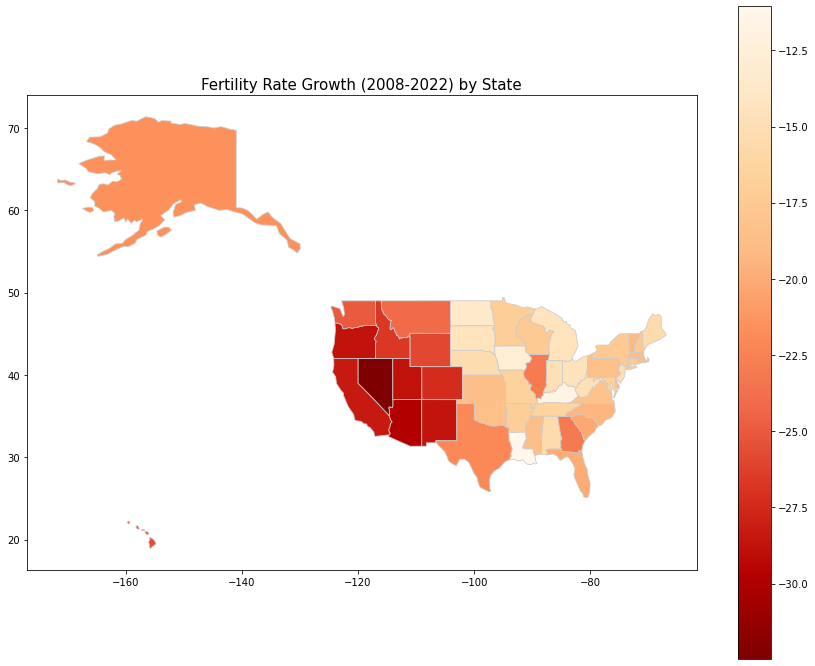

In [8]:
# download from - https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

# Load the shapefile from your local directory
shapefile_path = '/Users/aaron/Desktop/Code/fertility_rates/bordermap/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
usa = gpd.read_file(shapefile_path)

# Filter for the United States (if needed)
usa = usa[usa['admin'] == 'United States of America']

# Simplify to just the states
usa = usa[['geometry', 'name']]

# Rename the 'name' column to 'State' for merging
usa = usa.rename(columns={'name': 'State'})

# Merge the fertility data with the USA shapefile data
fertility_data_sorted['State'] = fertility_data_sorted.index  # Add the State column back for merging
merged = usa.set_index('State').join(fertility_data_sorted, how='inner')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged.plot(column='Growth Rate', cmap='OrRd_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Fertility Rate Growth (2008-2022) by State', fontsize=15)
plt.show()

       State  Year  Fertility Rate
17   Alabama  2008            2.06
69   Alabama  2009            1.95
121  Alabama  2010            1.87
173  Alabama  2011            1.84
225  Alabama  2012            1.81
277  Alabama  2013            1.79
329  Alabama  2014            1.83
381  Alabama  2015            1.83
433  Alabama  2016            1.82
485  Alabama  2017            1.82
537  Alabama  2018            1.79
589  Alabama  2019            1.81
641  Alabama  2020            1.78
693  Alabama  2021            1.77
745  Alabama  2022            1.74
2     Alaska  2008            2.41
54    Alaska  2009            2.27
106   Alaska  2010            2.35
158   Alaska  2011            2.28
210   Alaska  2012            2.19


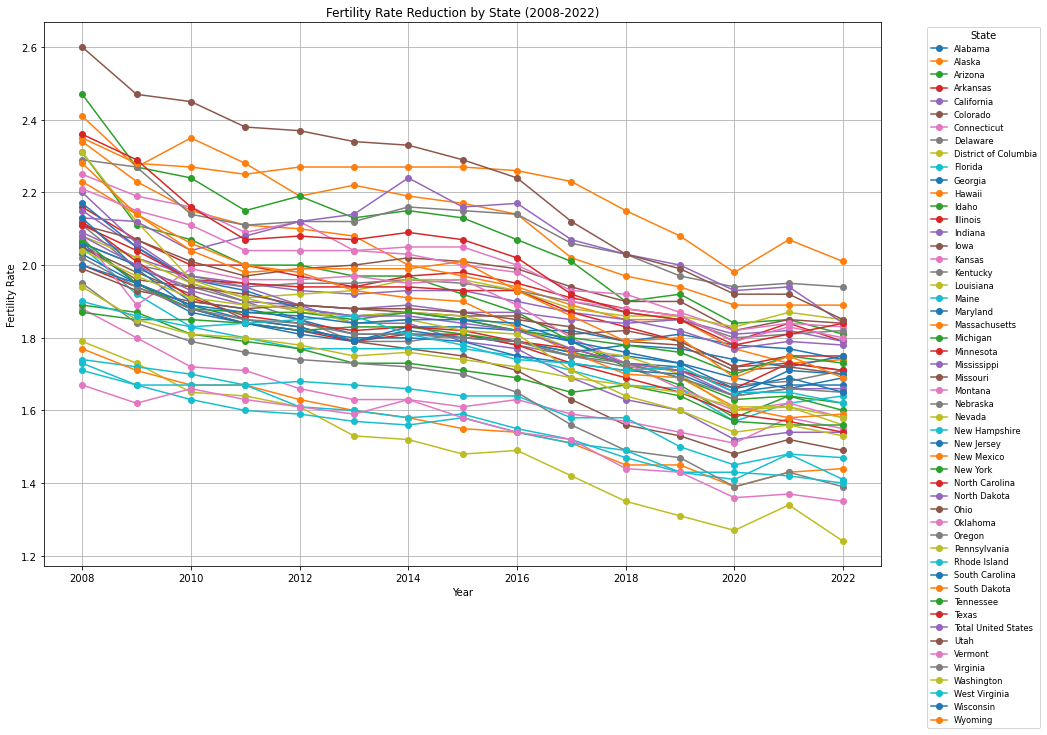

In [11]:

fertility_data.reset_index(inplace=True)

states_to_drop = ['Guam', 'American Samoa', 'Northern Mariana Is.', 'Puerto Rico', 'U.S. Virgin Islands']
fertility_data = fertility_data[~fertility_data['State'].isin(states_to_drop)]

fertility_data_long = fertility_data.melt(id_vars=['State'], 
                                          value_vars=[str(year) for year in range(2008, 2022+1)],
                                          var_name='Year', 
                                          value_name='Fertility Rate')

fertility_data_long['Year'] = fertility_data_long['Year'].astype(int)

fertility_data_long = fertility_data_long.sort_values(by=['State', 'Year'])

plt.figure(figsize=(15, 10))
for state in fertility_data_long['State'].unique():
    subset = fertility_data_long[fertility_data_long['State'] == state]
    plt.plot(subset['Year'], subset['Fertility Rate'], marker='o', label=state)

plt.title('Fertility Rate Reduction by State (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, frameon=True, fontsize='small')
plt.grid(True)
plt.show()


In [13]:
fig = px.line(fertility_data_long, x='Year', y='Fertility Rate', color='State',
              title='Fertility Rate Reduction by State (2008-2022)')

fig.show()

In [50]:
# income_data.reset_index(inplace=True)
merged = pd.merge(fertility_data, income_data, on='State', how='left', suffixes=('_fertility', '_income'))


In [52]:
merged.columns

Index(['State', '2008', '2009', '2010_fertility', '2011_fertility',
       '2012_fertility', '2013_fertility', '2014_fertility', '2015_fertility',
       '2016_fertility', '2017_fertility', '2018_fertility', '2019_fertility',
       '2020', '2021_fertility', '2022', 'Growth Rate', 'level_0', 'index',
       '2021_income', '2019_income', '2018_income', '2017_income',
       '2016_income', '2015_income', '2014_income', '2013_income',
       '2012_income', '2011_income', '2010_income', 'Growth rate'],
      dtype='object')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['2010_x', '2011_x', '2012_x', '2013_x', '2014_x', '2015_x']"

Correlation between fertility and income for South Dakota: nan
Correlation between fertility and income for Nebraska: nan
Correlation between fertility and income for Alaska: nan
Correlation between fertility and income for Louisiana: nan
Correlation between fertility and income for Utah: nan
Correlation between fertility and income for Iowa: nan
Correlation between fertility and income for North Dakota: nan
Correlation between fertility and income for Texas: nan
Correlation between fertility and income for Kansas: nan
Correlation between fertility and income for Kentucky: nan
Correlation between fertility and income for Idaho: nan
Correlation between fertility and income for Oklahoma: nan
Correlation between fertility and income for Arkansas: nan
Correlation between fertility and income for Mississippi: nan
Correlation between fertility and income for Indiana: nan
Correlation between fertility and income for Minnesota: nan
Correlation between fertility and income for New Jersey: nan
C

ValueError: x and y must be the same size

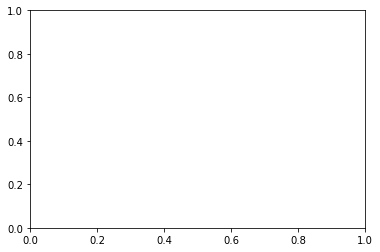